In [83]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.mapping import operator_map_reaction
from IPython.display import SVG
import ast

In [10]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [11]:
df = pd.read_parquet(Path(cfg.interim_data) / "mapped_reactions.parquet")
print(len(df))
df.head(20)

18520


,id,smarts,am_smarts,rule,reaction_center
0,0,NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...,[CH:1]([CH2:3][CH2:5][CH:6]([NH2:7])[C:8](=[O:...,[#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...,"[[[4], [3, 4, 5, 6, 7, 47], [2]], [[0, 1], [0,..."
1,1,CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O,[CH:1]([CH:2]([OH:3])[C:9](=[O:10])[OH:11])([C...,([#6:1]-[#8:2].[#6:3]-[#8:4])>>([#6:1].[#6:3]=...,"[[[5, 6, 7, 8]], [[0, 1, 2], [0]]]"
2,3,CSCCC(=O)C(=O)O.O=CO>>CSCCC(=O)C(O)=CO.O=O,[C:1]([C:3]([CH2:5][CH2:7][S:8][CH3:9])=[O:6])...,[#6:1]=[#8:2].[#6:3]=[#8:4]>>[#6:1]=[#6:3].[#8...,"[[[6, 7], [1, 0]], [[0, 1], [0, 1]]]"
3,5,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C...,[CH:1]1([O:50][P:51]([O:52][P:55]([O:56][CH2:5...,([#8:1].[#6:2]-[#8:3]).[#6:4]-[#8:5]>>([#6:2]-...,"[[[31, 21, 20], [27, 26]], [[0, 1, 2, 3], [0]]]"
4,5,O=P(O)(OC1C(O)C(O)C(O)C(O)C1O)OC1C(O)C(O)C(O)C...,[CH:1]1([OH:50])[CH:3]([OH:6])[CH:5]([OH:10])[...,[#6:1]-[#8:2].[#8:3]-[#15:4]>>[#6:1]-[#8:3].[#...,"[[[36, 37], [20, 17]], [[0, 1], [0, 1]]]"
5,5,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C...,[CH:1]1([O:50][P:51]([O:52][P:55]([O:56][CH2:5...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],"[[[21, 20], [37]], [[0, 1], [0]]]"
6,6,*C(=O)NC(*)C(=O)OC1C(COP(*)(=O)O)OC(n2cnc3c(N)...,[O:1]([CH:4]1[CH:2]([OH:25])[CH:9]([n:11]2[cH:...,([#6:1]-[#8:2].[#6:3]-[#8:4]).[#8:5]>>([#8:2]....,"[[[6, 8, 29, 30], [0]], [[0, 1, 2], [0, 1]]]"
7,6,*C(=O)NC(*)C(=O)OC1C(COP(*)(=O)O)OC(n2cnc3c(N)...,[C:1]([CH:3]([NH:5][C:7]([*:8])=[O:9])[*:6])(=...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],"[[[6, 8], [0]], [[0, 1], [0]]]"
8,7,O=C(O)C1=CC(OP(=O)(O)O)C(O)C(O)C1.C=C(OP(=O)(O...,[CH:1]1([O:22][P:23](=[O:24])([OH:25])[OH:26])...,([#8:1].[#6:2]-[#8:3]).[#6:4]-[#8:5]>>([#6:2]-...,"[[[14, 5, 6], [1, 2]], [[0, 1, 2, 3], [0]]]"
9,7,O=C(O)C1=CC(OP(=O)(O)O)C(O)C(O)C1.C=C(OP(=O)(O...,[CH:1]1([OH:22])[CH:3]([OH:6])[CH:5]([O:9][P:1...,[#6:1]-[#8:2].[#8:3]-[#15:4]>>[#6:1]-[#8:3].[#...,"[[[13, 14], [2, 3]], [[0, 1], [0, 1]]]"


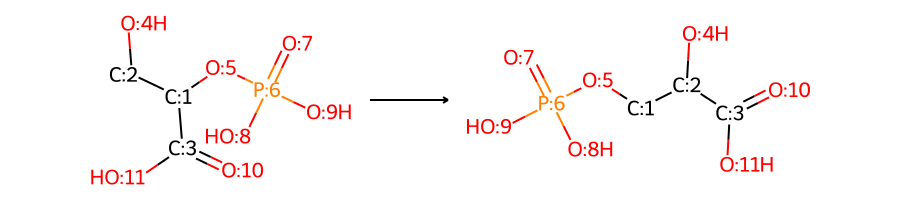

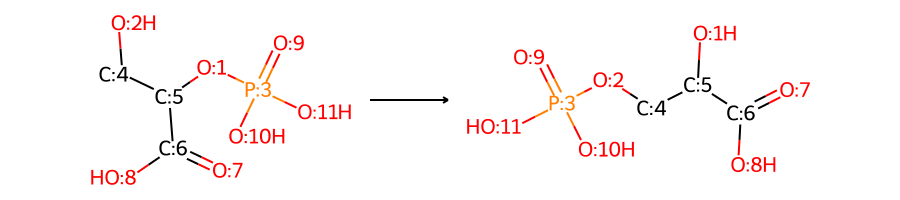

In [12]:
for _, row in df.loc[df["id"] == '59'].iterrows():
    display(SVG(draw_reaction(row["am_smarts"])))

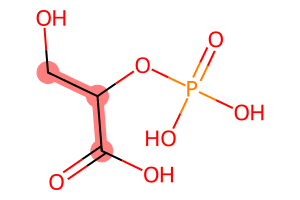

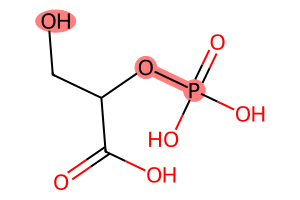

In [34]:
for _, row in df.loc[df["id"] == '59'].iterrows():
    rsmi = row["smarts"].split(">>")[0]
    hatoms = row["reaction_center"][0][0].tolist()
    display(SVG(draw_molecule(rsmi, highlight_atoms=hatoms, size=(300, 200))))

In [36]:
dfr = pd.read_parquet(Path(cfg.processed_data) / "pathway_level" / "enzymatic_reactions.parquet")
print(len(dfr))
dfr.head(20)

13851


,id,smarts,am_smarts,rule,reaction_center
0,0,NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...,[CH:1]([CH2:3][CH2:5][CH:6]([NH2:7])[C:8](=[O:...,[#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...,"[[[4], [3, 4, 5, 6, 7, 47], [2]], [[0, 1], [0,..."
1,1,CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O,[CH:1]([CH:2]([OH:3])[C:9](=[O:10])[OH:11])([C...,([#6:1]-[#8:2].[#6:3]-[#8:4])>>([#6:1].[#6:3]=...,"[[[5, 6, 7, 8]], [[0, 1, 2], [0]]]"
2,10,CCCCCCCCCCCC(=O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc...,[C:1]([CH2:3][CH2:5][CH2:6][CH2:7][CH2:8][CH2:...,[#6:1]-[#8:2].[#8:3]-[#15:4]>>[#6:1]-[#8:3].[#...,"[[[11, 13], [2, 1]], [[0, 1], [0, 1]]]"
3,100,*C(=O)OCC(COP(=O)(O)OC1C(O)C(OP(=O)(O)O)C(O)C(...,[CH:1]1([O:32][P:33](=[O:34])([OH:35])[OH:36])...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],"[[[15, 16], [0]], [[0, 1], [0]]]"
4,1000,CCC=O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)...,[CH:1]([CH2:3][CH3:5])=[O:4].[c:6]1([C:12]([NH...,[#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...,"[[[2], [3, 4, 5, 6, 7, 47], [0]], [[0, 1], [0,..."
5,10000,CC(=O)C1CCC2C3C(O)C=C4CC(O)CCC4(C)C3CCC12C.NC(...,[CH:49]1([OH:50])[CH:51]2[CH:53]3[CH2:56][CH2:...,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,"[[[8, 9], [3, 4, 5, 6, 7, 47]], [[0, 1, 2, 3, ..."
6,10003,O=C(O)CCCCCCCCCCCCCCC(=O)O.Nc1ncnc2c1ncn2C1OC(...,[C:1](=[O:3])([CH2:4][CH2:5][CH2:6][CH2:7][CH2...,[#6:1]-[#8:2].[#8:3].[#8:4]-[#15:5]>>[#6:1]-[#...,"[[[1, 2], [21], [2, 1]], [[0, 1], [0], [0, 1]]]"
7,10008,O=[N+]([O-])c1ccc(OP(=O)(O)O)cc1.O>>O=[N+]([O-...,[c:1]1([O:11][P:12](=[O:13])([OH:14])[OH:15])[...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],"[[[6, 7], [0]], [[0, 1], [0]]]"
8,10009,NC(=O)CCC(N)C(=O)O.NC1CC(=O)C(O)C(O)C1O>>NC1CC...,[NH2:2][CH:12]([CH2:14][CH2:16][C:19]([NH2:20]...,[#6:1]-[#7:2].[#6:3]=[#8:4]>>[#6:3]-[#7:2].[#6...,"[[[5, 6], [3, 4]], [[0, 1], [0, 1]]]"
9,1001,O=C(CO)C(O)CO>>O=CC(O)C(O)CO,[CH2:1]([OH:2])[C:3](=[O:4])[CH:5]([OH:6])[CH2...,([#6:1]-[#8:2].[#6:3]=[#8:4])>>([#6:1]=[#8:2]....,"[[[2, 3, 1, 0]], [[0, 1, 2, 3]]]"


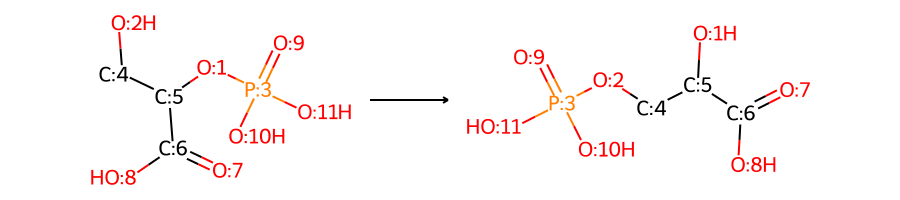

In [38]:
for _, row in dfr.loc[dfr["id"] == '59'].iterrows():
    display(SVG(draw_reaction(row["am_smarts"])))

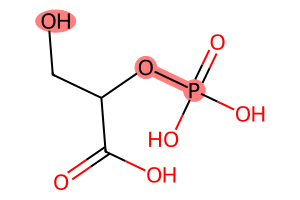

In [39]:
for _, row in dfr.loc[dfr["id"] == '59'].iterrows():
    rsmi = row["smarts"].split(">>")[0]
    hatoms = row["reaction_center"][0][0].tolist()
    display(SVG(draw_molecule(rsmi, highlight_atoms=hatoms, size=(300, 200))))

In [44]:
rxn = dfr.loc[dfr["id"] == '59', "am_smarts"].values[0]
rule = dfr.loc[dfr["id"] == '59', "rule"].values[0]
print(rxn)
print(rule)

[O:1]([P:3](=[O:9])([OH:10])[OH:11])[CH:5]([CH2:4][OH:2])[C:6](=[O:7])[OH:8]>>[OH:1][CH:5]([CH2:4][O:2][P:3](=[O:9])([OH:10])[OH:11])[C:6](=[O:7])[OH:8]
([#8:1].[#8:2]-[#15:3])>>([#8:2].[#8:1]-[#15:3])


In [45]:
res = operator_map_reaction(rxn, rule)

In [46]:
res

OperatorMapResult(did_map=False, aligned_smarts=None, atom_mapped_smarts=None, reaction_center=None)

In [78]:
mm = pd.read_parquet(Path(cfg.processed_data) / "mcsa" / "mapped_mech_labeled_reactions.parquet")
print(len(mm))
mm.head()

482


,entry_id,mechanism_id,smarts,am_smarts,rule,reaction_center,mech_atoms,enzyme_name,uniprot_id,ec
0,1,1,NC(CCC(=O)O)C(=O)O>>NC(CCC(=O)O)C(=O)O,[CH:1]([CH2:3][CH2:2][C:4](=[O:9])[OH:10])([NH...,[#6:1]-[#6:2]-[#6:3]-[#6:4]>>[#6:1]-[#6:3]-[#6...,"[[[1, 2, 3, 4]], [[0, 1, 2, 3]]]","[[0, 1, 2, 3]]",glutamate racemase,P56868,5.1.1.3
1,2,2,*C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O.O>>*C(=O)NC...,[N:1]12[C:2](=[O:5])[CH:4]([NH:6][C:8]([*:10])...,[#6:1]-[#7:2].[#8:3]>>([#7:2].[#6:1]-[#8:3]),"[[[5, 7], [0]], [[0, 1, 2]]]","[[5, 6, 7], [0]]",beta-lactamase (Class A),P62593,3.5.2.6
2,2,1,*C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O.O>>*C(=O)NC...,[N:1]12[C:2](=[O:5])[CH:4]([NH:6][C:8]([*:10])...,[#6:1]-[#7:2].[#8:3]>>([#7:2].[#6:1]-[#8:3]),"[[[5, 7], [0]], [[0, 1, 2]]]","[[5, 6, 7], [0]]",beta-lactamase (Class A),P62593,3.5.2.6
3,6,1,NC(CCC(=O)NC(CSSCC(NC(=O)CCC(N)C(=O)O)C(=O)NCC...,[S:1]([CH2:2][CH:3]([NH:4][C:6]([CH2:9][CH2:12...,[#16:1]-[#16:2].[#6:3]1=[#6:4]-[#7:5]-[#6:6]=[...,"[[[9, 10], [3, 4, 5, 45, 46, 47]], [[0], [0], ...","[[9, 10], [14, 15, 16, 20]]",glutathione-disulfide reductase,P00390,1.8.1.7
4,7,2,NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC...,[c:11]1([C:17]([NH2:18])=[O:19])[cH:12][n+:13]...,[#6:1]1:[#6:2]:[#6:3]:[#6:4]:[#7+:5]:[#6:6]:1....,"[[[3, 4, 5, 6, 7, 47], [7, 5, 4, 8, 9]], [[0, ...","[[14, 15, 16, 20], [3, 4, 6, 8, 9, 10]]",isocitrate dehydrogenase (NADP+),P08200,1.1.1.42


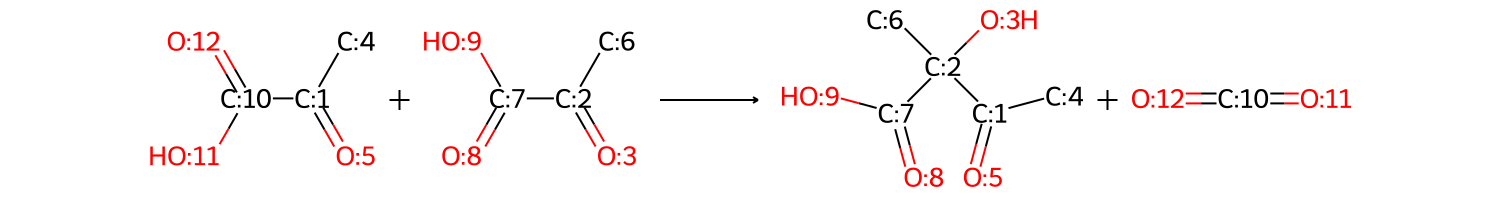

In [79]:
display(SVG(draw_reaction(mm.loc[mm['entry_id'] == 722, 'am_smarts'].values[0])))

In [84]:
mech_df = pd.read_csv(Path(cfg.interim_data) / 'mcsa' / 'mech_labeled_reactions.csv', sep=",")
mech_df['mech_atoms'] = mech_df['mech_atoms'].apply(lambda x: ast.literal_eval(x))

In [97]:
bad_entries = list(set(mech_df["entry_id"]) - set(mm["entry_id"]))

In [112]:
i=0

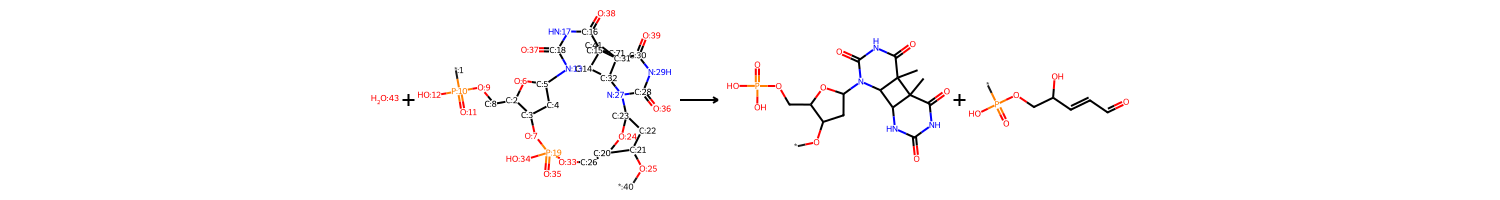

162


In [158]:

display(SVG(draw_reaction(mech_df.loc[mech_df['entry_id'] == bad_entries[i], 'smarts'].iloc[0])))
print(bad_entries[i])
i+=1

In [89]:
mech_df.head()

,entry_id,mechanism_id,smarts,mech_atoms,enzyme_name,uniprot_id,ec
0,1,1,[O:28]=[C:29]([O-:30])[CH:31]([NH3+:32])[CH2:3...,"[[28, 29, 30, 31]]",glutamate racemase,P56868,5.1.1.3
1,2,2,[OH2:60].[CH:23]1([NH:36][C:38]([*:39])=[O:40]...,"[[60], [24, 25, 27]]",beta-lactamase (Class A),P62593,3.5.2.6
2,2,1,[OH2:61].[CH:39]1([NH:52][C:54]([*:55])=[O:56]...,"[[61], [40, 41, 43]]",beta-lactamase (Class A),P62593,3.5.2.6
3,4,2,[Cu+2:75].[O:57]=[N:58][OH:59]>>O.[N]=O.[Cu+],"[[], [57, 58, 59]]",nitrite reductase (copper type),P25006,1.7.2.1
4,4,1,[Cu+2:65].[O:46]=[N:47][OH:48]>>O.[N]=O.[Cu+],"[[65], [46, 47, 48]]",nitrite reductase (copper type),P25006,1.7.2.1
